In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch.nn as nn

In [3]:
X = torch.linspace(1,50,50).reshape(-1,1)
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [4]:
torch.manual_seed(71)
e = torch.randint(-8,9, (50,1), dtype = torch.float32)
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [5]:
y = 2*X+1+e
y

tensor([[ 5.],
        [12.],
        [ 9.],
        [15.],
        [13.],
        [ 9.],
        [17.],
        [12.],
        [23.],
        [22.],
        [25.],
        [28.],
        [28.],
        [21.],
        [36.],
        [38.],
        [29.],
        [37.],
        [32.],
        [33.],
        [40.],
        [44.],
        [49.],
        [43.],
        [48.],
        [56.],
        [57.],
        [60.],
        [63.],
        [66.],
        [64.],
        [72.],
        [73.],
        [68.],
        [65.],
        [68.],
        [72.],
        [84.],
        [79.],
        [89.],
        [82.],
        [83.],
        [89.],
        [81.],
        [90.],
        [99.],
        [87.],
        [94.],
        [92.],
        [99.]])

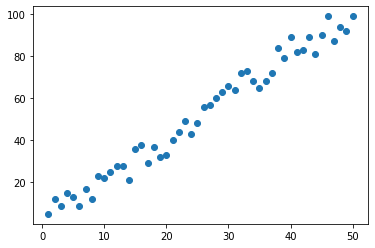

In [6]:
plt.scatter(X,y);

In [7]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [8]:
class Model(nn.Module):
    
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features) # Linear means full connected dense layer
    def forward(self, X):
        y_pred = self.linear(X)
        return y_pred

In [9]:
torch.manual_seed(59)

model = Model(in_features=1, out_features=1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


# Printing Model Param

In [10]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


# Prediction for new data

In [11]:
x = torch.tensor([2], dtype = torch.float32)
x

tensor([2.])

In [12]:
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [13]:
0.10597813129425049 * 2.0 + 0.9637961387634277


1.1757524013519287

In [14]:
model.linear.weight * 2.0 + model.linear.bias

tensor([[1.1758]], grad_fn=<AddBackward0>)

In [15]:
x1 = torch.linspace(0.0,50.0,50).reshape(-1,1)
x1

tensor([[ 0.0000],
        [ 1.0204],
        [ 2.0408],
        [ 3.0612],
        [ 4.0816],
        [ 5.1020],
        [ 6.1224],
        [ 7.1429],
        [ 8.1633],
        [ 9.1837],
        [10.2041],
        [11.2245],
        [12.2449],
        [13.2653],
        [14.2857],
        [15.3061],
        [16.3265],
        [17.3469],
        [18.3673],
        [19.3878],
        [20.4082],
        [21.4286],
        [22.4490],
        [23.4694],
        [24.4898],
        [25.5102],
        [26.5306],
        [27.5510],
        [28.5714],
        [29.5918],
        [30.6122],
        [31.6327],
        [32.6531],
        [33.6735],
        [34.6939],
        [35.7143],
        [36.7347],
        [37.7551],
        [38.7755],
        [39.7959],
        [40.8163],
        [41.8367],
        [42.8571],
        [43.8776],
        [44.8980],
        [45.9184],
        [46.9388],
        [47.9592],
        [48.9796],
        [50.0000]])

In [16]:
y_pred1 = model.forward(x1)
y_pred1

tensor([[0.9638],
        [1.0719],
        [1.1801],
        [1.2882],
        [1.3964],
        [1.5045],
        [1.6126],
        [1.7208],
        [1.8289],
        [1.9371],
        [2.0452],
        [2.1533],
        [2.2615],
        [2.3696],
        [2.4778],
        [2.5859],
        [2.6941],
        [2.8022],
        [2.9103],
        [3.0185],
        [3.1266],
        [3.2348],
        [3.3429],
        [3.4510],
        [3.5592],
        [3.6673],
        [3.7755],
        [3.8836],
        [3.9917],
        [4.0999],
        [4.2080],
        [4.3162],
        [4.4243],
        [4.5324],
        [4.6406],
        [4.7487],
        [4.8569],
        [4.9650],
        [5.0732],
        [5.1813],
        [5.2894],
        [5.3976],
        [5.5057],
        [5.6139],
        [5.7220],
        [5.8301],
        [5.9383],
        [6.0464],
        [6.1546],
        [6.2627]], grad_fn=<AddmmBackward>)

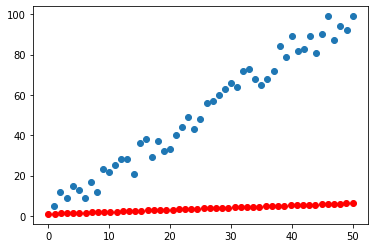

In [17]:
plt.scatter(X,y)
plt.scatter(x1.detach().numpy(),y_pred1.detach().numpy(), c = 'r')

1. All values of X are being passed one by one through the network 
2. On forward pass using random weights, some value of y gets predicted
3. Loss gets calc and back prop is done
4. The weights and bias are updated and then the next value of x is passed
5. Now once all the vales are passed forward and backward 1 epoch gets completed
6. Now the entire steps gets repetated for # of epochs

In [20]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr = 1e-3)
epochs = 50
losses = []
for i in range(epochs):
    i = i+1
    y_pred = model.forward(X) # prep on forward pass
    loss = criterion(y_pred,y) # calc loss
    losses.append(loss) # record loss
    print(f"epoch {i} loss: {loss.item()} weight: {model.linear.weight.item()}  bias {model.linear.bias.item()}")
    optimizer.zero_grad() # reset grad to prevent accumulation after every epoch as the grad value gets compounded 
    loss.backward() # perform back prop
    optimizer.step() # this updates the params

epoch 1 loss: 3057.216796875 weight: 0.10597813129425049  bias 0.9637961387634277
epoch 2 loss: 1588.5311279296875 weight: 3.334900379180908  bias 1.0604636669158936
epoch 3 loss: 830.2999877929688 weight: 1.0148327350616455  bias 0.9922628402709961
epoch 4 loss: 438.8524169921875 weight: 2.6817996501922607  bias 1.0425218343734741
epoch 5 loss: 236.7615203857422 weight: 1.4840211868286133  bias 1.0076650381088257
epoch 6 loss: 132.4291229248047 weight: 2.3446059226989746  bias 1.0339646339416504
epoch 7 loss: 78.56572723388672 weight: 1.7262253761291504  bias 1.0163217782974243
epoch 8 loss: 50.75775909423828 weight: 2.170504093170166  bias 1.0302516222000122
epoch 9 loss: 36.4012336730957 weight: 1.8512457609176636  bias 1.0214954614639282
epoch 10 loss: 28.989229202270508 weight: 2.0806007385253906  bias 1.029038906097412
epoch 11 loss: 25.162382125854492 weight: 1.9157683849334717  bias 1.0248701572418213
epoch 12 loss: 23.186473846435547 weight: 2.034165620803833  bias 1.029116272

Text(0, 0.5, 'MSE Loss')

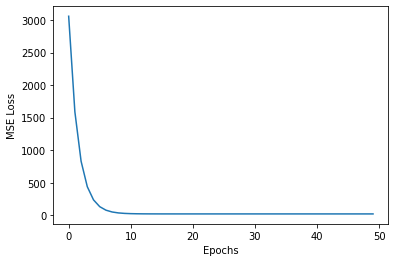

In [23]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')

In [26]:
weights = model.linear.weight.item()
bias = model.linear.bias.item()
x_ukn = torch.linspace(0.0,50.0,50)
y_pred = weights*x_ukn+bias

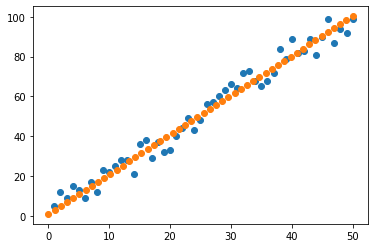

In [28]:
plt.scatter(X,y)
plt.scatter(x_ukn,y_pred)